In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings("ignore")

In [96]:
df = pd.read_csv(r"C:\Users\Din islam\Downloads\diabetics-prediction-\diabetes_dataset.csv")
df.head()

,Age,Pregnancies,BMI,Glucose,BloodPressure,HbA1c,LDL,HDL,Triglycerides,WaistCircumference,HipCircumference,WHR,FamilyHistory,DietType,Hypertension,MedicationUse,Outcome
0,56,10,20.24,136.20,83.09,4.32,143.82,56.43,150.97,78.57,102.97,0.76,1,0,1,1,0
1,69,11,25.50,93.02,64.23,6.20,82.91,21.40,141.16,95.37,109.94,0.87,1,1,1,0,0
2,46,8,21.98,101.95,96.23,5.77,115.48,60.09,156.10,89.29,85.57,1.04,0,2,0,1,1
3,32,10,27.63,89.33,91.52,8.13,73.30,44.51,72.89,101.58,103.84,0.98,1,0,1,1,1
4,60,11,25.17,117.64,64.88,5.51,133.26,20.00,218.38,106.12,84.82,1.25,0,0,1,1,1


In [97]:
# Shape of the dataset
df.shape

(9538, 17)

In [98]:
# For getting the information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9538 entries, 0 to 9537
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 9538 non-null   int64  
 1   Pregnancies         9538 non-null   int64  
 2   BMI                 9538 non-null   float64
 3   Glucose             9538 non-null   float64
 4   BloodPressure       9538 non-null   float64
 5   HbA1c               9538 non-null   float64
 6   LDL                 9538 non-null   float64
 7   HDL                 9538 non-null   float64
 8   Triglycerides       9538 non-null   float64
 9   WaistCircumference  9538 non-null   float64
 10  HipCircumference    9538 non-null   float64
 11  WHR                 9538 non-null   float64
 12  FamilyHistory       9538 non-null   int64  
 13  DietType            9538 non-null   int64  
 14  Hypertension        9538 non-null   int64  
 15  MedicationUse       9538 non-null   int64  
 16  Outcom

#### From the above information we can see that there are no null values of the dataset.
#### We can also see that the dataset contains no categorical values.

In [99]:
# Exploratory Data Analysis
# 1. Check for null values
df.isnull().sum()



Age                   0
Pregnancies           0
BMI                   0
Glucose               0
BloodPressure         0
HbA1c                 0
LDL                   0
HDL                   0
Triglycerides         0
WaistCircumference    0
HipCircumference      0
WHR                   0
FamilyHistory         0
DietType              0
Hypertension          0
MedicationUse         0
Outcome               0
dtype: int64

In [100]:
# Check fo the duplicates
df.duplicated().sum()

np.int64(0)

In [101]:
df.columns

Index(['Age', 'Pregnancies', 'BMI', 'Glucose', 'BloodPressure', 'HbA1c', 'LDL',
       'HDL', 'Triglycerides', 'WaistCircumference', 'HipCircumference', 'WHR',
       'FamilyHistory', 'DietType', 'Hypertension', 'MedicationUse',
       'Outcome'],
      dtype='object')

## Columns introduction
#### Age : Age of the patient
#### Pregnancies : Number of times a patient has been pregnant
#### BMI : Body Mas Index of the patient
#### Gloucose: Glucose level of the patient
#### Insulin: Insulin level of the patient
#### BloodPressure: Blood Pressure of the patient
#### LDL : Low-Density Lipoprotein level of the patient
#### HDL : High-Density Lipoprotein Level of the patient
#### HbA1c : Glycated Hemoglobin level of the patient
#### Triglycerides: Triglycerides level of the patient
#### WaistCircumference: Waist Circumference of the patient
#### HipCircumference: Hip circumference of the patient
#### WHR : Waist to Hip Ratio of the patient
#### Family History: Family history of diabetes
#### DietType: Type of diet followed by the patient
#### Hypertension: Hypertension status of the patient
#### MdecationUse: Medication use by the patient
#### Outcome: Target variable indicating if the patient has diabetes (1) or not (0)

In [102]:
# Data types of the columns
df.dtypes

Age                     int64
Pregnancies             int64
BMI                   float64
Glucose               float64
BloodPressure         float64
HbA1c                 float64
LDL                   float64
HDL                   float64
Triglycerides         float64
WaistCircumference    float64
HipCircumference      float64
WHR                   float64
FamilyHistory           int64
DietType                int64
Hypertension            int64
MedicationUse           int64
Outcome                 int64
dtype: object

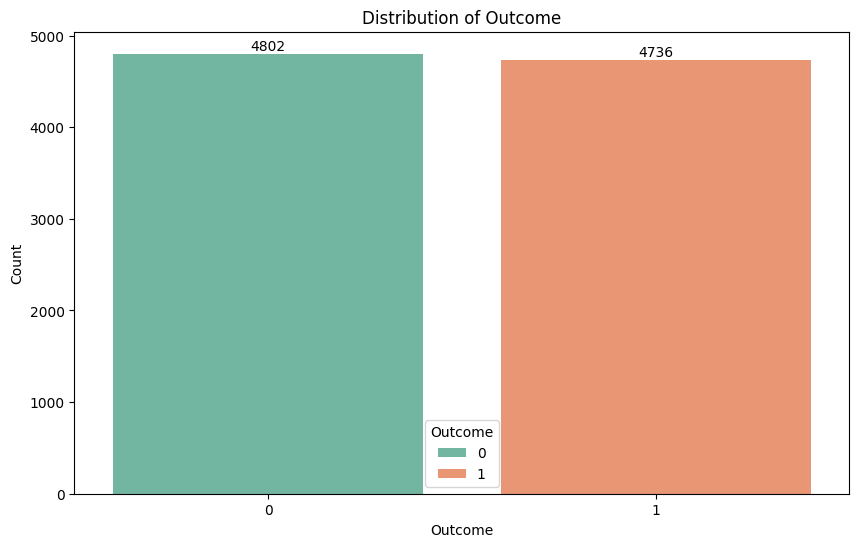

In [103]:
# 3. Check for the distribution of the data
plt.figure(figsize=(10 , 6))
ax = sns.countplot(x="Outcome", data=df,hue="Outcome", palette="Set2")
for i in ax.containers:
    ax.bar_label(i)
plt.title("Distribution of Outcome")
plt.xlabel("Outcome")
plt.ylabel("Count")
plt.show()

In [104]:
outcome_val_count = df["Outcome"].value_counts()
outcome_val_count

Outcome
0    4802
1    4736
Name: count, dtype: int64

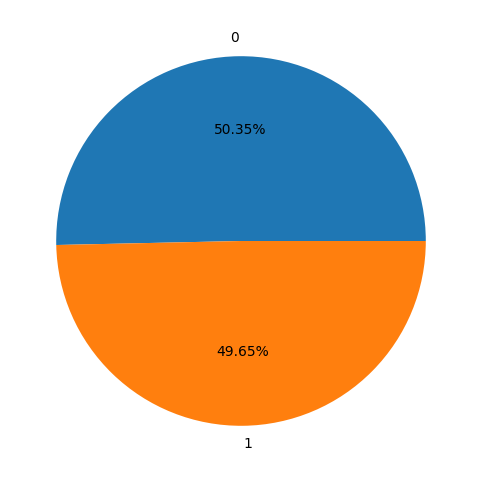

In [105]:
# pie chart
plt.figure(figsize=(8,6))
plt.pie(outcome_val_count,labels=["0","1"],autopct="%0.2f%%")
plt.show()

In [106]:
# Value counts of each column
df["Age"].value_counts()

Age
64    186
71    181
62    181
34    176
66    174
     ... 
60    136
27    135
44    127
24    126
48    120
Name: count, Length: 62, dtype: int64

In [107]:
df["Age"].nunique()

62

In [108]:
df["Age"].unique()

array([56, 69, 46, 32, 60, 25, 78, 38, 75, 36, 40, 28, 41, 70, 53, 57, 20,
       39, 19, 61, 47, 55, 77, 50, 29, 42, 66, 44, 76, 59, 45, 33, 79, 64,
       68, 72, 74, 54, 24, 26, 35, 21, 31, 67, 43, 37, 52, 34, 23, 71, 51,
       27, 48, 65, 62, 58, 18, 22, 30, 49, 73, 63])

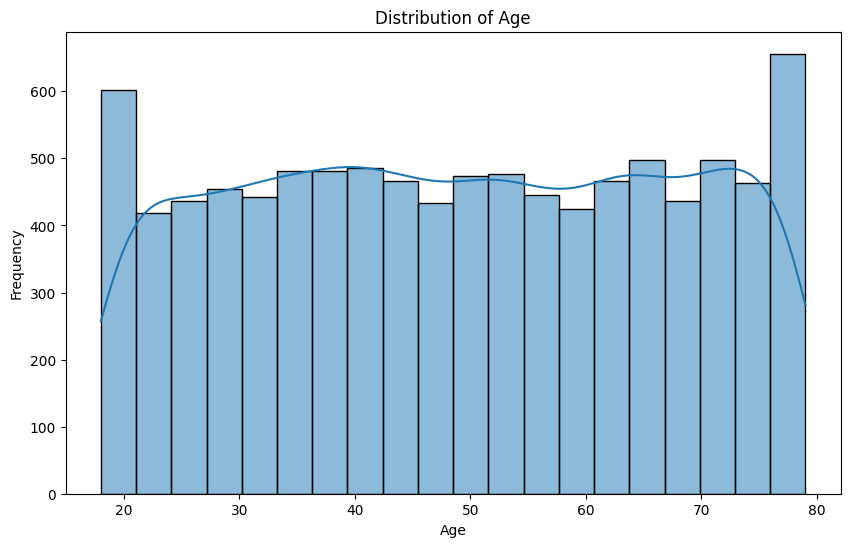

In [109]:
# Histogram of Age
plt.figure(figsize=(10,6))
sns.histplot(df["Age"],bins=20 , kde=True)
plt.title("Distribution of Age")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

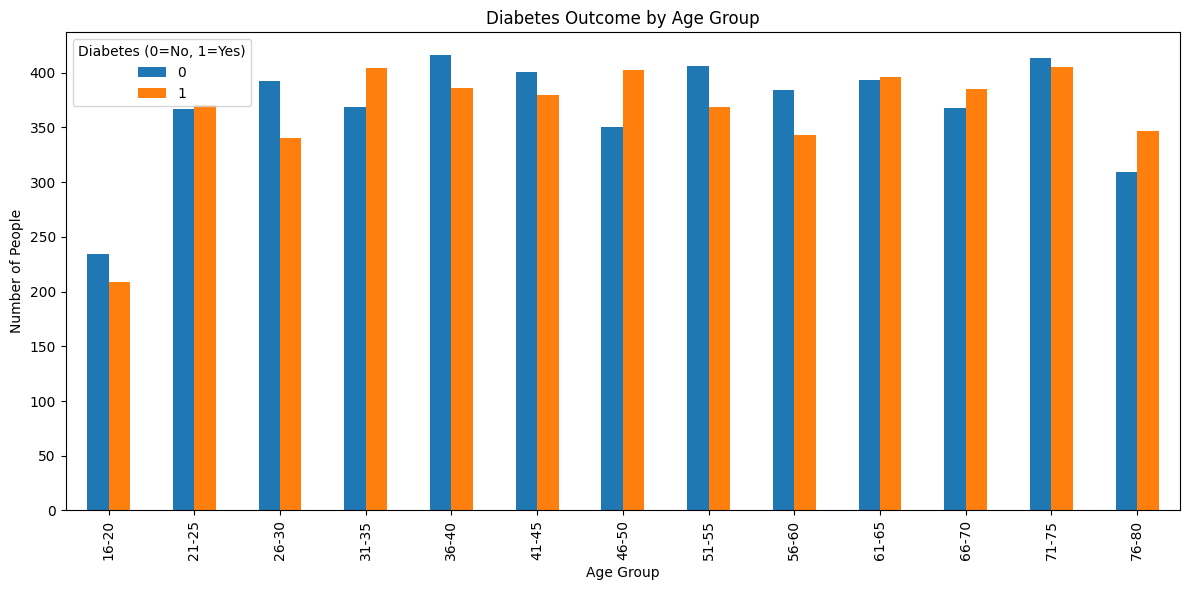

In [110]:
# Create age bins and labels
age_bins = np.arange(16, 82, 5)
age_labels = [f"{age_bins[i]}-{age_bins[i+1]-1}" for i in range(len(age_bins)-1)]

# Add a new column for age group
df['AgeGroup'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels, right=False)

# Group by AgeGroup and Outcome, then count
age_outcome_counts = df.groupby(['AgeGroup', 'Outcome']).size().unstack(fill_value=0)

# Plot
age_outcome_counts.plot(kind='bar', stacked=False, figsize=(12,6))

plt.title("Diabetes Outcome by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Number of People")
plt.legend(title="Diabetes (0=No, 1=Yes)")
plt.tight_layout()
plt.show()

In [111]:
df["Pregnancies"].value_counts()

Pregnancies
9     857
11    814
6     810
5     805
4     798
1     794
8     793
0     791
3     781
2     781
7     771
10    743
Name: count, dtype: int64

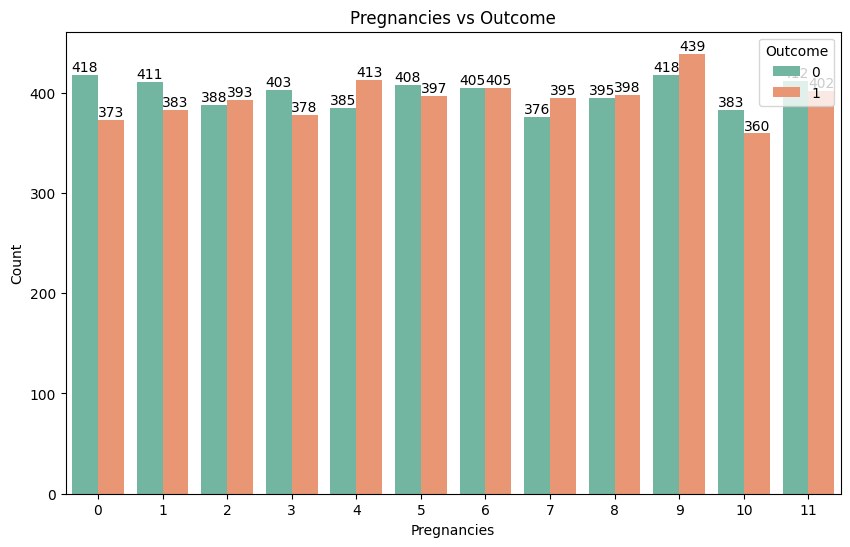

In [112]:
plt.figure(figsize=(10,6))
bx =sns.countplot(x ="Pregnancies", hue="Outcome",data=df, palette="Set2")
for i in bx.containers:
    bx.bar_label(i)
plt.title("Pregnancies vs Outcome")
plt.xlabel("Pregnancies")
plt.ylabel("Count")
plt.legend(title="Outcome", loc="upper right")
plt.show()

In [113]:
df.columns

Index(['Age', 'Pregnancies', 'BMI', 'Glucose', 'BloodPressure', 'HbA1c', 'LDL',
       'HDL', 'Triglycerides', 'WaistCircumference', 'HipCircumference', 'WHR',
       'FamilyHistory', 'DietType', 'Hypertension', 'MedicationUse', 'Outcome',
       'AgeGroup'],
      dtype='object')

In [114]:
df.BMI.value_counts()

BMI
15.00    88
22.98    18
27.09    16
27.85    15
25.04    15
         ..
17.17     1
34.13     1
17.95     1
32.83     1
36.21     1
Name: count, Length: 2135, dtype: int64

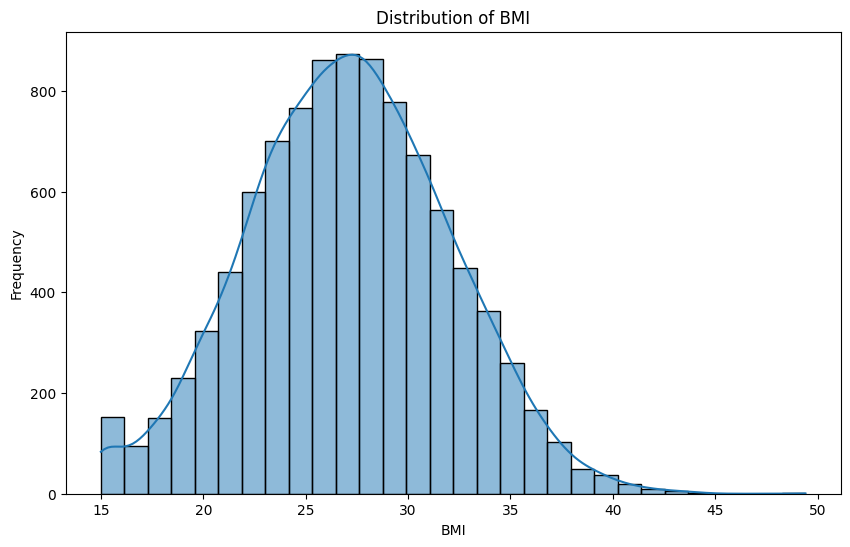

In [115]:
# Histogram for BMI
plt.figure(figsize=(10,6))
sns.histplot(df["BMI"], bins=30, kde=True)
plt.title("Distribution of BMI")
plt.xlabel("BMI")
plt.ylabel("Frequency")
plt.show()


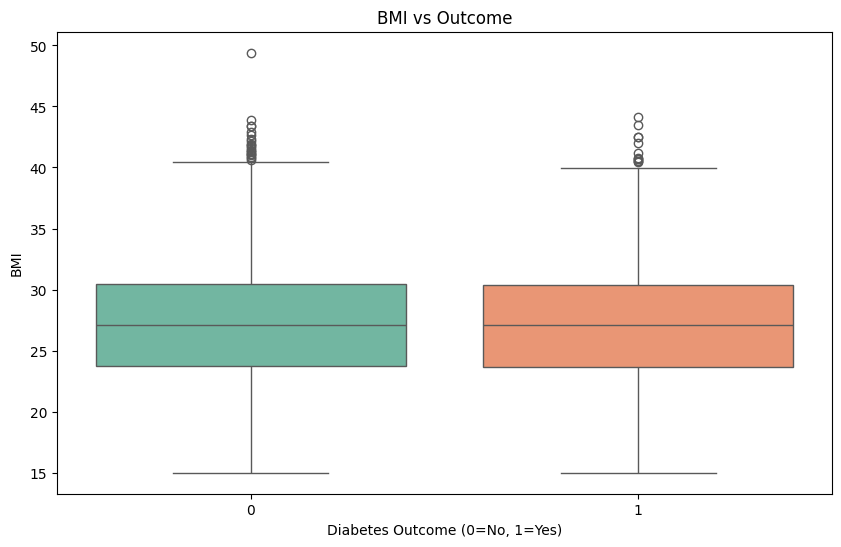

In [116]:
plt.figure(figsize=(10,6))
sns.boxplot(x="Outcome", y="BMI", data=df, palette="Set2")
plt.title("BMI vs Outcome")
plt.xlabel("Diabetes Outcome (0=No, 1=Yes)")
plt.ylabel("BMI")
plt.show()

In [117]:
df.groupby(['Glucose','Outcome'])['Outcome'].count()

Glucose  Outcome
50.00    0           88
         1          107
50.02    1            1
50.03    0            1
         1            1
                   ... 
178.97   1            1
180.38   1            1
190.07   0            1
190.28   1            1
198.56   0            1
Name: Outcome, Length: 7220, dtype: int64

In [118]:
df["BloodPressure"].value_counts()

BloodPressure
40.00    22
72.25    11
78.39     9
77.40     9
71.25     9
         ..
91.22     1
99.74     1
53.52     1
88.44     1
79.36     1
Name: count, Length: 4128, dtype: int64

In [119]:
df["HbA1c"].value_counts()

HbA1c
3.00    181
5.02     44
5.29     43
5.44     42
5.91     42
       ... 
9.74      1
8.07      1
8.71      1
8.63      1
9.32      1
Name: count, Length: 583, dtype: int64

In [120]:
df['HDL'].value_counts()

HDL
20.00     89
57.10      9
100.00     9
57.53      8
47.12      8
          ..
40.45      1
76.50      1
44.05      1
80.65      1
43.57      1
Name: count, Length: 4646, dtype: int64

In [121]:
df.groupby(["Hypertension","Outcome"])["Outcome"].count()

Hypertension  Outcome
0             0          2427
              1          2324
1             0          2375
              1          2412
Name: Outcome, dtype: int64

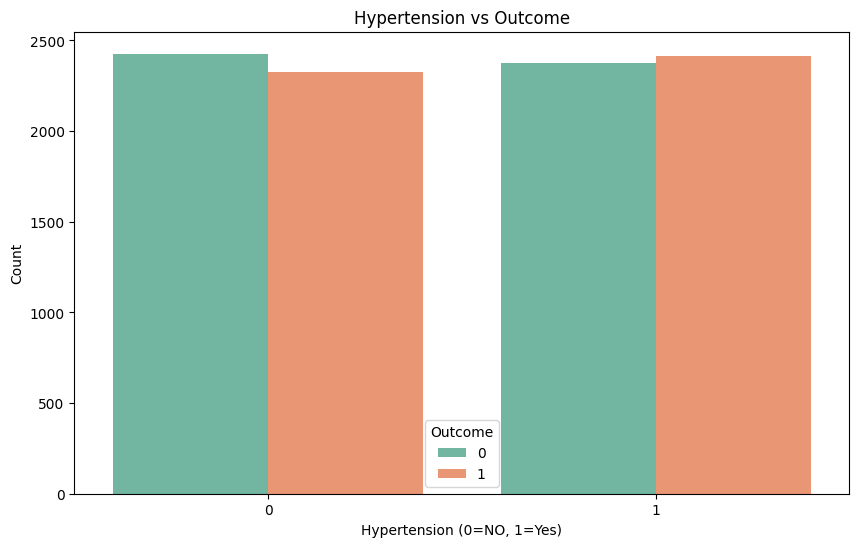

In [122]:
# plot for hypertension
plt.figure(figsize=(10,6))
sns.countplot(x="Hypertension",hue="Outcome",data=df,palette="Set2")
plt.title("Hypertension vs Outcome")
plt.xlabel("Hypertension (0=NO, 1=Yes)")
plt.ylabel("Count")
plt.show()

In [123]:
df.groupby(["DietType","Outcome"])["Outcome"].count()

DietType  Outcome
0         0          1648
          1          1567
1         0          1564
          1          1615
2         0          1590
          1          1554
Name: Outcome, dtype: int64

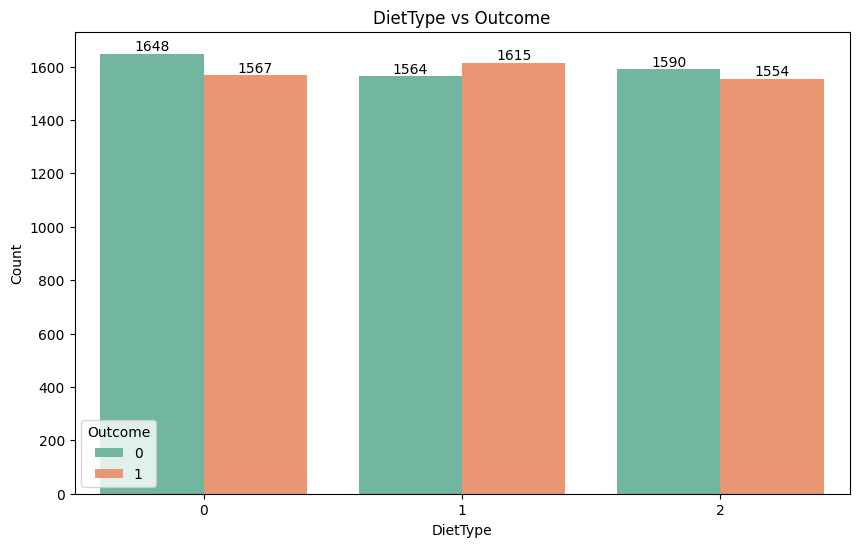

In [124]:
plt.figure(figsize=(10,6))
b = sns.countplot(x="DietType",hue="Outcome",data=df,palette="Set2")
for i in b.containers:
    b.bar_label(i)
plt.title("DietType vs Outcome")
plt.xlabel("DietType")
plt.ylabel("Count")
plt.show()

In [125]:
df["HipCircumference"].value_counts()

HipCircumference
70.00     190
90.67       9
100.83      8
93.80       8
98.25       7
         ... 
117.62      1
115.09      1
92.41       1
71.61       1
131.81      1
Name: count, Length: 4517, dtype: int64

In [126]:
df["FamilyHistory"].value_counts()

FamilyHistory
1    4775
0    4763
Name: count, dtype: int64

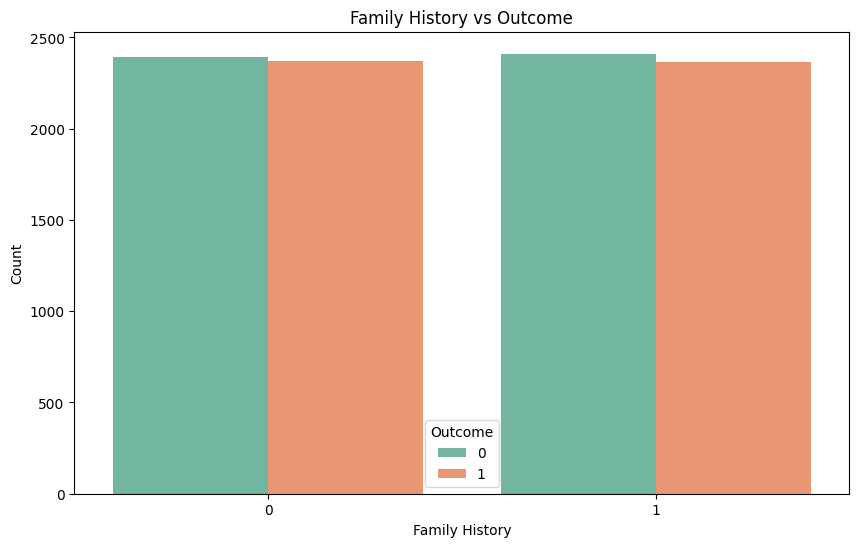

In [127]:
plt.figure(figsize=(10,6))
sns.countplot(x="FamilyHistory",hue="Outcome",data=df, palette="Set2")
plt.title("Family History vs Outcome")
plt.xlabel("Family History")
plt.ylabel("Count")
plt.show()

In [128]:
df["MedicationUse"].value_counts()

MedicationUse
1    4808
0    4730
Name: count, dtype: int64

In [129]:
df["LDL"].value_counts()

LDL
30.00     120
99.37       5
88.83       5
129.40      5
108.34      5
         ... 
163.84      1
96.85       1
78.16       1
117.36      1
48.50       1
Name: count, Length: 6702, dtype: int64

## Exploratory Analysis of Features Based on Outcome
We will analyze each feature in relation to the Outcome variable (diabetes: 0=No, 1=Yes) to identify patterns and important predictors.

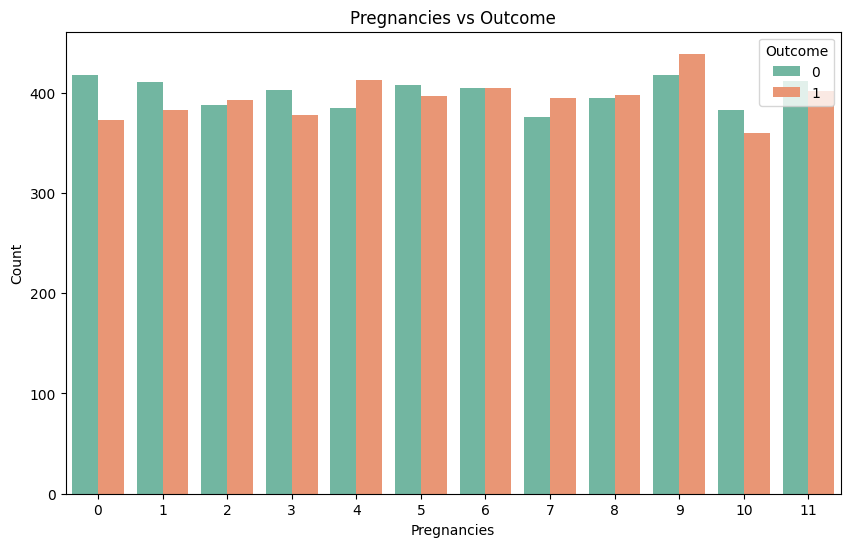

In [130]:
# Pregnancies vs Outcome
plt.figure(figsize=(10,6))
sns.countplot(x="Pregnancies", hue="Outcome", data=df, palette="Set2")
plt.title("Pregnancies vs Outcome")
plt.xlabel("Pregnancies")
plt.ylabel("Count")
plt.legend(title="Outcome", loc="upper right")
plt.show()

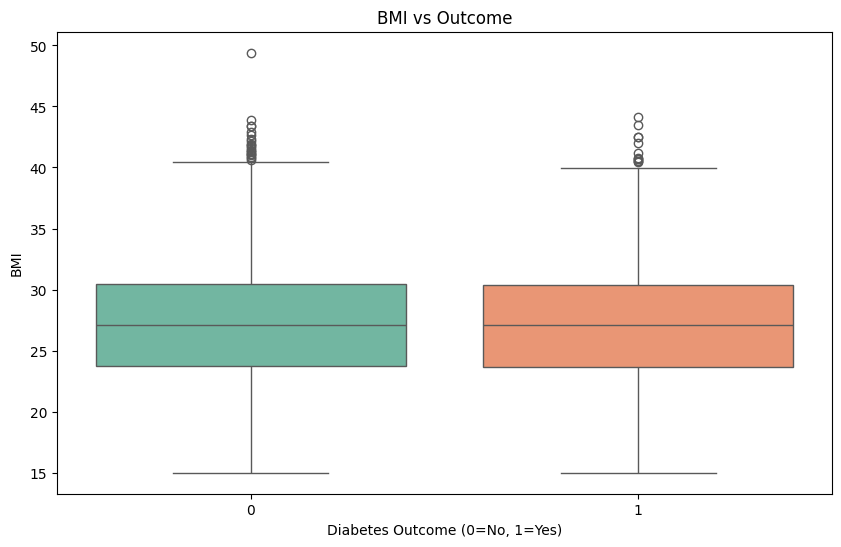

In [131]:
# BMI vs Outcome
plt.figure(figsize=(10,6))
sns.boxplot(x="Outcome", y="BMI", data=df, palette="Set2")
plt.title("BMI vs Outcome")
plt.xlabel("Diabetes Outcome (0=No, 1=Yes)")
plt.ylabel("BMI")
plt.show()

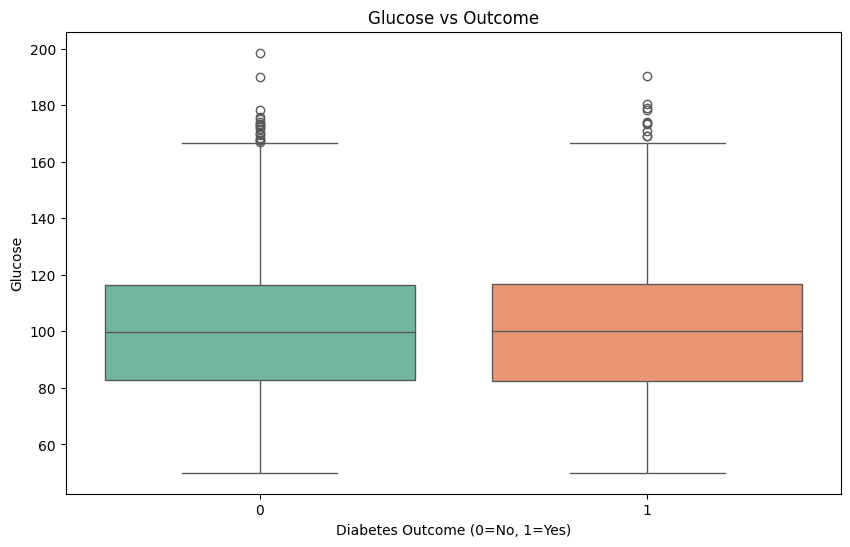

In [132]:
# Glucose vs Outcome
plt.figure(figsize=(10,6))
sns.boxplot(x="Outcome", y="Glucose", data=df, palette="Set2")
plt.title("Glucose vs Outcome")
plt.xlabel("Diabetes Outcome (0=No, 1=Yes)")
plt.ylabel("Glucose")
plt.show()

In [133]:
# Insulin vs Outcome
plt.figure(figsize=(10,6))
sns.boxplot(x="Outcome", y="Insulin", data=df, palette="Set2")
plt.title("Insulin vs Outcome")
plt.xlabel("Diabetes Outcome (0=No, 1=Yes)")
plt.ylabel("Insulin")
plt.show()

ValueError: Could not interpret value `Insulin` for `y`. An entry with this name does not appear in `data`.

<Figure size 1000x600 with 0 Axes>

In [ ]:
# BloodPressure vs Outcome
plt.figure(figsize=(10,6))
sns.boxplot(x="Outcome", y="BloodPressure", data=df, palette="Set2")
plt.title("Blood Pressure vs Outcome")
plt.xlabel("Diabetes Outcome (0=No, 1=Yes)")
plt.ylabel("Blood Pressure")
plt.show()

In [ ]:
# LDL vs Outcome
plt.figure(figsize=(10,6))
sns.boxplot(x="Outcome", y="LDL", data=df, palette="Set2")
plt.title("LDL vs Outcome")
plt.xlabel("Diabetes Outcome (0=No, 1=Yes)")
plt.ylabel("LDL")
plt.show()

In [ ]:
# HDL vs Outcome
plt.figure(figsize=(10,6))
sns.boxplot(x="Outcome", y="HDL", data=df, palette="Set2")
plt.title("HDL vs Outcome")
plt.xlabel("Diabetes Outcome (0=No, 1=Yes)")
plt.ylabel("HDL")
plt.show()

In [ ]:
# HbA1c vs Outcome
plt.figure(figsize=(10,6))
sns.boxplot(x="Outcome", y="HbA1c", data=df, palette="Set2")
plt.title("HbA1c vs Outcome")
plt.xlabel("Diabetes Outcome (0=No, 1=Yes)")
plt.ylabel("HbA1c")
plt.show()

In [ ]:
# Triglycerides vs Outcome
plt.figure(figsize=(10,6))
sns.boxplot(x="Outcome", y="Triglycerides", data=df, palette="Set2")
plt.title("Triglycerides vs Outcome")
plt.xlabel("Diabetes Outcome (0=No, 1=Yes)")
plt.ylabel("Triglycerides")
plt.show()

In [ ]:
# WaistCircumference vs Outcome
plt.figure(figsize=(10,6))
sns.boxplot(x="Outcome", y="WaistCircumference", data=df, palette="Set2")
plt.title("Waist Circumference vs Outcome")
plt.xlabel("Diabetes Outcome (0=No, 1=Yes)")
plt.ylabel("Waist Circumference")
plt.show()

In [ ]:
# HipCircumference vs Outcome
plt.figure(figsize=(10,6))
sns.boxplot(x="Outcome", y="HipCircumference", data=df, palette="Set2")
plt.title("Hip Circumference vs Outcome")
plt.xlabel("Diabetes Outcome (0=No, 1=Yes)")
plt.ylabel("Hip Circumference")
plt.show()

In [ ]:
# WHR vs Outcome
plt.figure(figsize=(10,6))
sns.boxplot(x="Outcome", y="WHR", data=df, palette="Set2")
plt.title("Waist to Hip Ratio (WHR) vs Outcome")
plt.xlabel("Diabetes Outcome (0=No, 1=Yes)")
plt.ylabel("WHR")
plt.show()

In [ ]:
# FamilyHistory vs Outcome
plt.figure(figsize=(8,6))
sns.countplot(x="FamilyHistory", hue="Outcome", data=df, palette="Set2")
plt.title("Family History vs Outcome")
plt.xlabel("Family History")
plt.ylabel("Count")
plt.show()

In [ ]:
# DietType vs Outcome
plt.figure(figsize=(8,6))
sns.countplot(x="DietType", hue="Outcome", data=df, palette="Set2")
plt.title("Diet Type vs Outcome")
plt.xlabel("Diet Type")
plt.ylabel("Count")
plt.show()

In [ ]:
# Hypertension vs Outcome
plt.figure(figsize=(8,6))
sns.countplot(x="Hypertension", hue="Outcome", data=df, palette="Set2")
plt.title("Hypertension vs Outcome")
plt.xlabel("Hypertension")
plt.ylabel("Count")
plt.show()

In [ ]:
# MedicationUse vs Outcome
plt.figure(figsize=(8,6))
sns.countplot(x="MedicationUse", hue="Outcome", data=df, palette="Set2")
plt.title("Medication Use vs Outcome")
plt.xlabel("Medication Use")
plt.ylabel("Count")
plt.show()

## Summary: Most Responsible Features for Diabetes
Based on the exploratory analysis above, features that show strong differences between diabetic and non-diabetic groups (such as higher Glucose, BMI, HbA1c, Insulin, Waist Circumference, and the presence of Hypertension and Family History) are likely to be more responsible for diabetes. Categorical features like Family History, Hypertension, and DietType also show clear patterns. Further statistical analysis or feature importance from a predictive model can confirm these findings.